# Predicting Subscription Status Based on Experience Level, Age, and Hours Played 

#### Anthony Lu (35658681), Ashley Lee (42273995), and Guneet Kaur (38663498)

In [26]:
library(tidyverse)
library(janitor)
library(tidymodels)

## Introduction

A study was conducted by a computer science group from UBC to try and understand how individuals play video games. Specifically, the game Minecraft was used to record play sessions through a server. Minecraft is a 3D open world video game made in 2009 and is played by people of a wide variety of ages (Hennginson, 2022). Because the play sessions were recorded, the number of hours played by each player was also observed in the study. Additionally, there are specific experience level classifications of players: Beginner, Amateur, Regular, Pro, and Veteran. Furthermore, within the game, there is a game-related newsletter which players can choose to subscribe to or not. From this data collected, the research group was able to form two datasets; one with information regarding players’ skill level and demographics and the other one with information about past play sessions. 

The research group posed three broad questions, of which this report aims to answer the first one: 
* What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter and how do these features differ between player types? 

Specifically, this report chose to focus on answering the following question:
* Can experience level, hours played and age of a player predict whether or not they are subscribed to a game-related newsletter? 

For this question, k-nearest neighbours classification will be used because it aims to predict a known class/category for a new observation using quantitative explanatory variables from past observations. Regression will not be used because the prediction made is not a numerical/quantitative measurement. Classification is more appropriate in this case because the response variable is categorical: a player is either subscribed or not subscribed.
    
To answer this question, we use the players.csv dataset. This dataset has 7 columns/variables and 196 observations/rows, each being representative of a different player. It is useful because it provides specific information about players: the columns include experience level, if they are subscribed to the newsletter, hashed email, hours played, name, gender and age. Specifically for this project, the predictor variables (variable used to predict results) used are experience level, hours played and age and the response variable (variable predicted) is whether they are subscribed to the newsletter. 

## Methods and Results
### Relevant Dataset
* players.csv. Let's read it in!

In [27]:
players_url <- "https://raw.githubusercontent.com/anthonyl8/video_game_server_usage/refs/heads/main/data/players.csv"
players <- read_csv(players_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


---

### Tidying the Data

Below, we've tidied the data by: 
* Cleaning the column names
* Mutating character variable columns with distinct categories to become factor variable columns
* Removing the 2 players whose ages are recorded as N/A, because they do not comprise a significant portion of the dataset

In [28]:
players <- players |>
    clean_names() |>
    mutate(experience = as_factor(experience), gender = as_factor(gender)) |>
    drop_na()

---
### Description of Tidied Data
* **Rows/Observations**: 194 (each represents a player)
* **Columns/Variables**: 7

**Categorical Variables:**
* experience (factor): player's experience level on a scale of 5 categories
* subscribe (logical): whether a player is subscribed to a game-related newsletter or not
* hashed_email (character): player's email address in a hashed format
* name (character): player's first name
* gender (factor): player's gender
  
**Quantitative Variables:**
* played_hours (double): number of hours played by player
* age (double): player's age
---

### Additional Wrangling
To answer some question, we'll need to do some more wrangling:
* Since we're using experience as an explanatory variable, we'll need to mutate the experience column to become quantitative. We'll mutate the values in the experience column to integers from 1 to 5. We are not given an ordering for the categories for experience level, but this report *assumes* the following order by skill level: **Beginner**, **Amateur**, **Regular**, **Pro**, **Veteran**. Thus, the values in the experience column will be mutated to become integers from 1 to 5, where 1 = Beginner and 5 = Veteran.
* Because subscribe is the response variable, it will also need to be mutated to become a factor variable.

In [29]:
players <- players |>
    mutate(experience = as.integer(fct_recode(experience, "1" = "Beginner", "2" = "Amateur", "3" = "Regular", "4" = "Pro", "5" = "Veteran")), 
           subscribe = as_factor(subscribe))

---

### Summary Statistics
We've reported the following summary statistics below:
* Mean and standard deviation for our explanatory variables (**played_hours**, **age**, and **experience**), which are quantitative
* Categorical and relative frequencies for our response variable (**subscribe**), which is categorical

#### Hours Played:

In [30]:
players_summary_hours_played <- players |>
    summarize(avg_played_hours = mean(played_hours),
              sd_played_hours = sd(played_hours))
players_summary_hours_played

avg_played_hours,sd_played_hours
<dbl>,<dbl>
5.904639,28.49793


#### Age:

In [31]:
players_summary_age <- players |>
    summarize(avg_age = mean(age),
              sd_age = sd(age))
players_summary_age

avg_age,sd_age
<dbl>,<dbl>
20.52062,6.174667


#### Experience:

In [32]:
players_experience <- players |>
    count(experience) |>
    mutate(num_players = n) |>
    select(-n)
players_experience

experience,num_players
<int>,<int>
1,13
2,48
3,63
4,35
5,35


#### Subscribe:

In [33]:
players_subscribe <- players |>
    count(subscribe) |>
    mutate(num_players = n) |>
    mutate(proportion_of_players = num_players / 194) |>
    select(-n)
players_subscribe

subscribe,num_players,proportion_of_players
<fct>,<int>,<dbl>
FALSE,52,0.2680412
TRUE,142,0.7319588


---
### Visualizations and Conclusions

Here are three visualizations, each of which compares one explanatory variable to the response variable (subscription status).

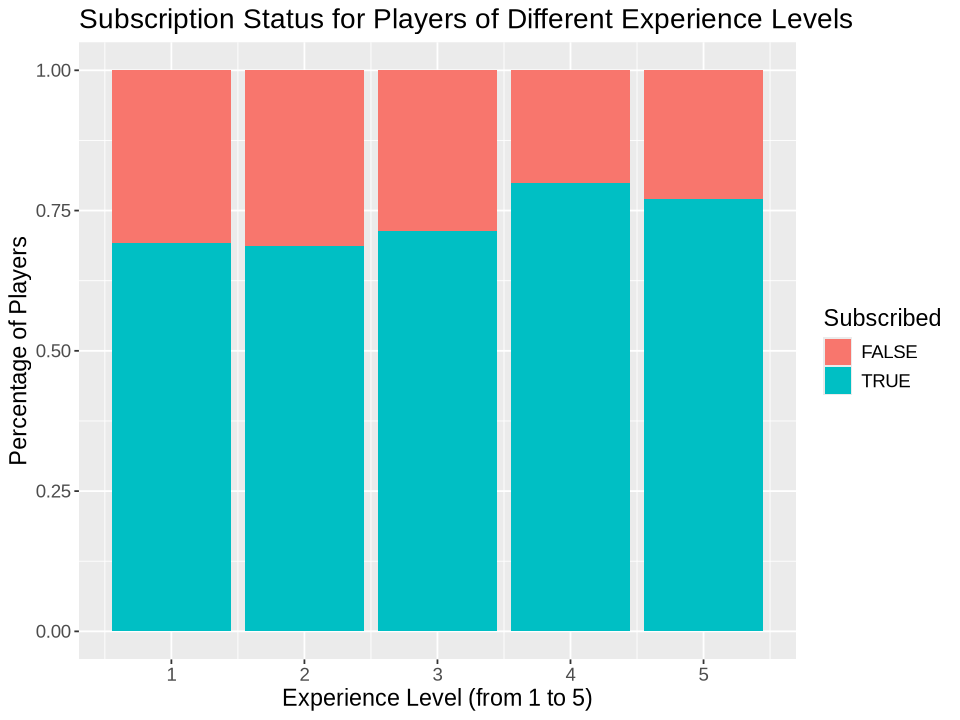

In [34]:
options(repr.plot.width = 8, repr.plot.height = 6)
players_experience_plot <- players |>
    ggplot(aes(x = experience)) +
    geom_bar(stat = "count", position = "fill", aes(fill = subscribe)) +
    xlab("Experience Level (from 1 to 5)") +
    ylab("Percentage of Players") +
    ggtitle("Subscription Status for Players of Different Experience Levels") +
    labs(fill = "Subscribed") +
    theme(text = element_text(size = 14))
players_experience_plot

#### Figure 1: Segmented bar chart showing relative frequencies of players' subscription statuses for each experience level

<br>

**Conclusion:** It seems like player experience level could be related to subscription status. *Maybe* more experienced players are more likely to be subscribed? This observed relationship is definitely not super strong, though.

<br>

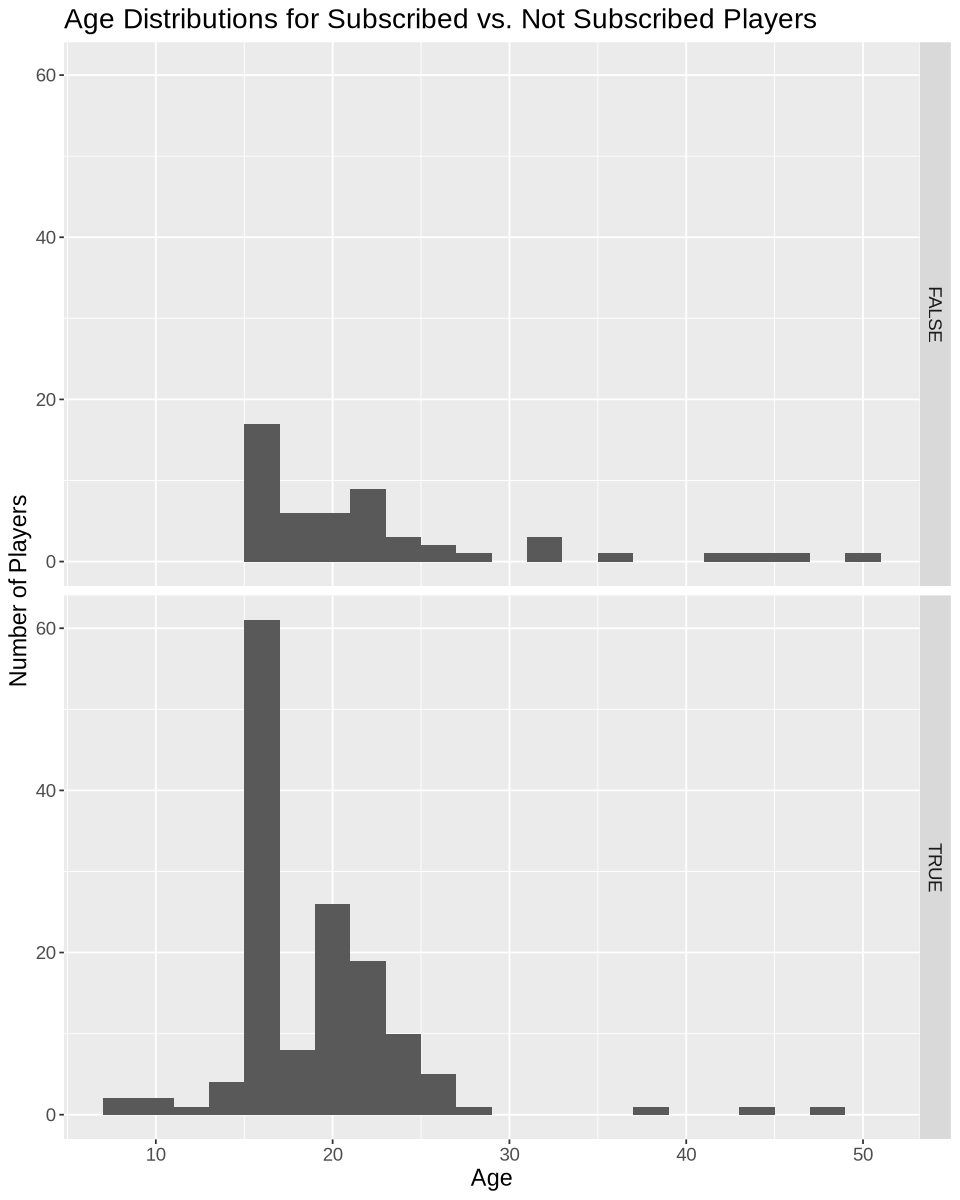

In [35]:
options(repr.plot.height = 10, repr.plot.width = 8)
players_age_plot <- players |>
    ggplot(aes(x = age)) +
    geom_histogram(binwidth = 2) +
    facet_grid(rows = vars(subscribe)) +
    xlab("Age") +
    ylab("Number of Players") +
    ggtitle("Age Distributions for Subscribed vs. Not Subscribed Players") +
    theme(text = element_text(size = 14))
players_age_plot

#### Figure 2: Two histograms showing distributions of player ages for each subscription status

<br>

**Conclusion:** It seems like player age could be related to subscription status. *Maybe* subscribed players are a bit more likely to be younger? However, most players seem to be younger anyway.

<br>

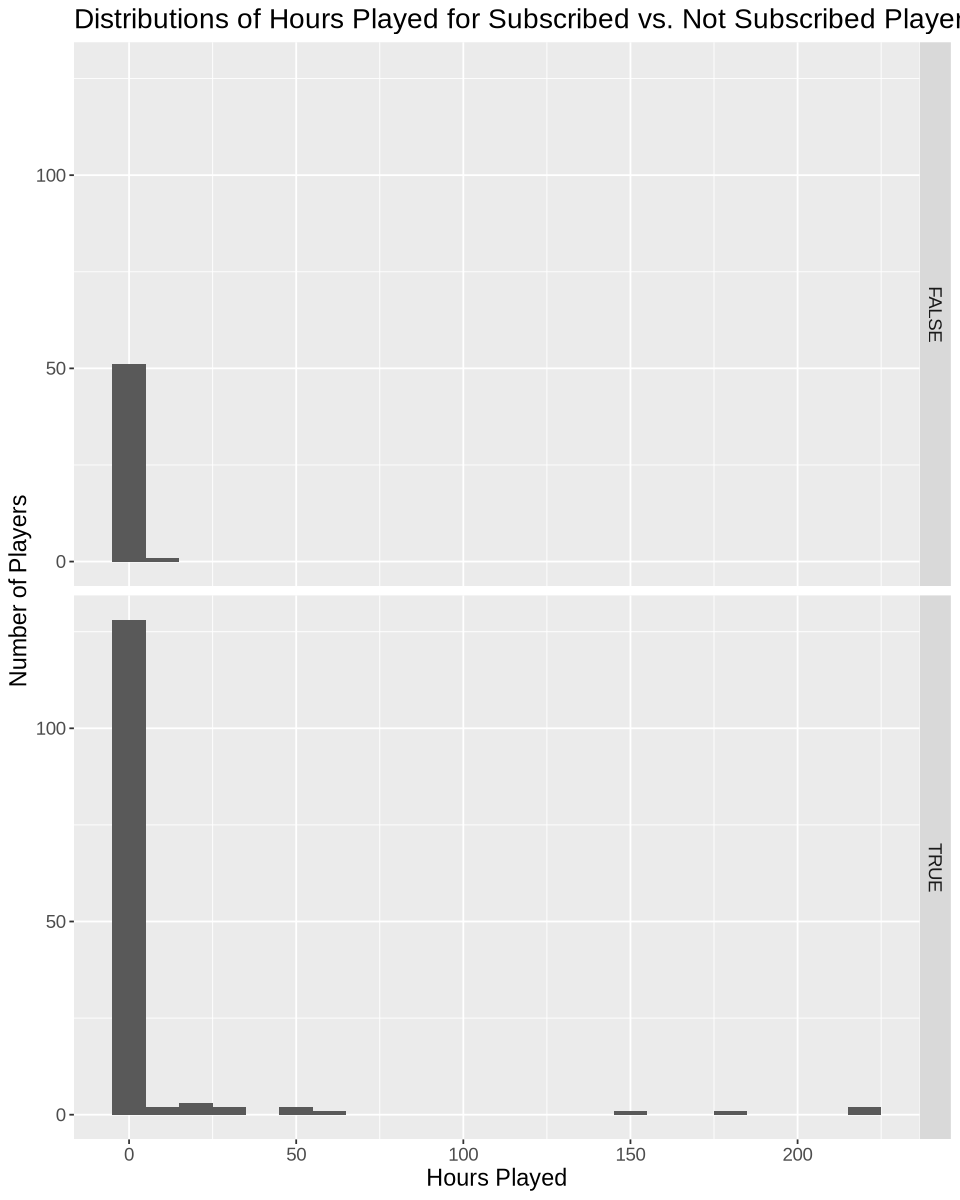

In [36]:
options(repr.plot.height = 10, repr.plot.width = 8)
players_played_hours_plot <- players |>
    ggplot(aes(x = played_hours)) +
    geom_histogram(binwidth = 10) +
    facet_grid(rows = vars(subscribe)) +
    xlab("Hours Played") +
    ylab("Number of Players") +
    ggtitle("Distributions of Hours Played for Subscribed vs. Not Subscribed Players") +
    theme(text = element_text(size = 14))
players_played_hours_plot

#### Figure 3: Two histograms showing distributions of hours played for each subscription status

<br>

**Conclusion**: It seems like hours played could be related to subscription status. It definitely appears that players who've played for way more hours than most others are all subscribed.

<br>

All 3 predictor variables seem like they could be somehow correlated with subscription status, which validates the specific question posed by this report. However, all observed relationships also do not seem very strong, so further investigation will be necessary in order to draw more specific conclusions.

---
### Addressing the Question

This report will use k nearest neighbours classification, which is appropriate because we are predicting a categorical variable using 3 quantitative predictor variables. This method requires few assumptions, but it may be sensitive to outliers.

Let's split the data into training and testing sets (at a 75/25 ratio), stratifying by subscription status. Of course, before doing that, we'll set the seed to 50.

In [37]:
set.seed(50)

players_split <- initial_split(players, prop = 0.75, strata = subscribe)  
players_train <- training(players_split)   
players_test <- testing(players_split)
head(players_train)
head(players_test)

experience,subscribe,hashed_email,played_hours,name,gender,age
<int>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
3,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
3,FALSE,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22
3,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17
2,FALSE,f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea,0.0,Finn,Male,23
2,FALSE,951e54f7376e2b2f0915e9e3646c701af4a2fe839385b13f9e0084b08f8070bd,0.1,Vivienne,Male,18
3,FALSE,df6a1201c9c638aff1df8aeaf459a5b0a00aa04824936ee0305f5c275352c647,0.0,Vasco,Prefer not to say,33


experience,subscribe,hashed_email,played_hours,name,gender,age
<int>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
2,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
2,TRUE,6f9acf8ea9956fe817895c78d10e1e25c11aba335a451e5b0322b073ee5008c4,0.0,Niamh,Non-binary,17
5,TRUE,9db37a1d381697f6c83e3b97b276e38bb9d9c811ba4596edb75d4dbfea6415b0,0.0,Elodie,Female,17
4,TRUE,bc704ff2bc676dbf48ee41b9e11481c1387bf758ad318f2428f336e3fecc6660,0.3,Andy,Male,8
5,TRUE,89c8e07d6a2aa102d9cd05086d51b2e41195c9c807dd976a06f4262ff36d0cca,0.0,Ren,Male,17
3,TRUE,119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,0.7,Hugo,Female,21


Let's make a model specification that tunes on the number of neighbours. Then, we'll create a recipe that uses experience, played_hours, and age as predictor variables and subscribe as the response variable. We'll scale and center our 3 predictors. 

In [38]:
knn_tune <- nearest_neighbor(weight = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
knn_tune
players_recipe <- recipe(subscribe ~ experience + played_hours + age, data = players_train) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())
players_recipe

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



Next, we'll perform a 5-fold cross-validation on the training set to determine the optimal k (number of neighbours), creating a workflow analysis with the recipe and model specifications from above and trying k = 1 to k = 50.

In [39]:
k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)
knn_results <- workflow() |>
      add_recipe(players_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = players_vfold, grid = k_vals)

Now, we'll collect the metrics from our workflow analysis and filter the metrics by accuracy.

In [40]:
knn_metrics <- knn_results |>
    collect_metrics()
accuracies <- knn_metrics |> 
      filter(.metric == "accuracy")

And let's create a plot to visualize the accuracy as k increases.

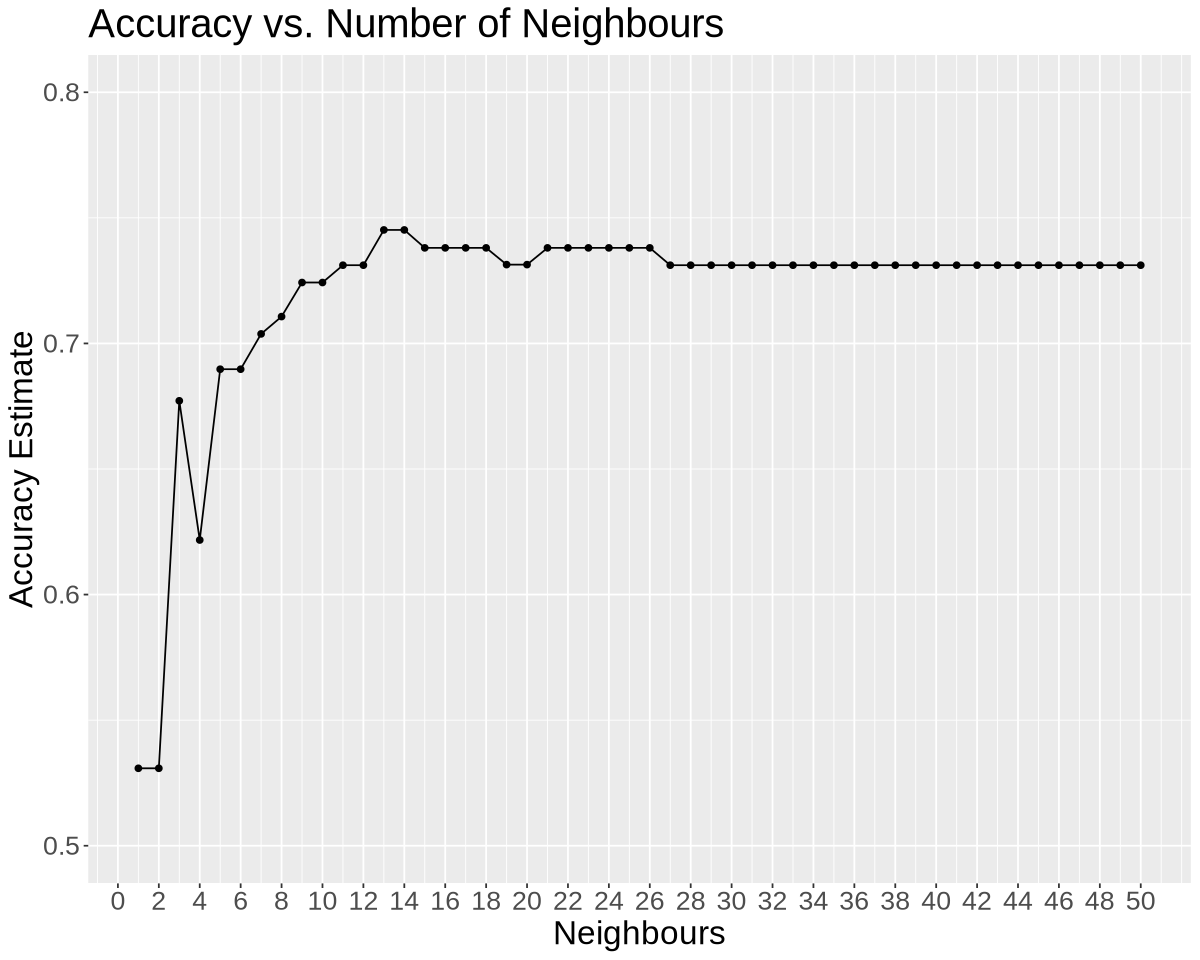

In [41]:
options(repr.plot.width = 10, repr.plot.height = 8)
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbours", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 50, by = 2)) +
      scale_y_continuous(limits = c(0.5, 0.8)) +
      theme(text = element_text(size = 20)) +
      ggtitle("Accuracy vs. Number of Neighbours")
accuracy_versus_k

#### Figure 4: Accuracy Estimate for Increasing Number of Neighbours

<br>

From Figure 4, it appears that **k = 13** or **k = 14** neighbours will give us the highest accuracy. We'll use k = 13 to create our final model.

Let's first create our model specification with our chosen optimal k (13).

In [42]:
knn_final_spec <- nearest_neighbor(weight = "rectangular", neighbors = 13) |>
    set_engine("kknn") |>
    set_mode("classification")
knn_final_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 13
  weight_func = rectangular

Computational engine: kknn 


Now, let's create a workflow analysis. We'll use our new model specification, reuse the previous recipe specification, and pass in our training dataset.

In [43]:
knn_final_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(knn_final_spec) |>
    fit(data = players_train)
knn_final_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(13,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.262069
Best kernel: rectangular
Best k: 13

Next, we'll use this final model to make predictions on the testing dataset. Then, we'll determine the accuracy of these predictions and also show the confusion matrix.

In [44]:
knn_final_predictions <- predict(knn_final_fit, players_test) |>
    bind_cols(players_test)

knn_final_metrics <- knn_final_predictions |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy")

knn_final_conf_mat <- knn_final_predictions |>
    conf_mat(truth = subscribe, estimate = .pred_class)

knn_final_metrics
knn_final_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6938776


          Truth
Prediction FALSE TRUE
     FALSE     0    2
     TRUE     13   34

From above, we can see that the accuracy of the predictions on the testing dataset is around 0.694, which is not great. From the confusion matrix, we see that our model seems to just predict that the vast majority of players are subscribed, with 47 positive predictions compared to just 2 negative predictions.

### Discussion 

In our initial exploratory data analysis, we found that players with higher experience levels were slightly more likely to be subscribed to the newsletter, and those who played more hours than average were much more likely to be subscribed. While subscribed players also seemed to be slightly younger, the difference in age between subscribed and unsubscribed players was quite small, likely because most of the players in the dataset were already on the younger side.

When we ran the k-nearest neighbours classification model we created on our testing dataset, it did not perform very well. The model predicted that 47 of 49 players in the testing dataset—so almost everyone—was subscribed. Additionally, of the two players it predicted were not subscribed, both were actually subscribed. This led to an accuracy of 0.694—lower than that of the majority classifier, which would have an accuracy equal to 0.732, the proportion of subscribed players. This showed that the three predictor variables we used (experience, hours played, and age), when put together, were not strong enough predictors for subscription status.

These results were somewhat surprising to us. We expected that players who are more experienced and who have played for more hours would be more likely to be subscribed because they would be more engaged with Minecraft. We also thought older players would subscribe less often because they might be less familiar with technology as well as have less time compared to younger players. While the trends in our exploratory graphs supported some of these ideas, it seems like they weren’t strong enough to build a successful predictive model. It is possible that the class imbalance of subscription status in our initial dataset—with 73.2% of players subscribed compared to just 26.8% not subscribed—also played a role in the model's failure and it predicting that almost everyone was subscribed.

Even so, our findings could still have somewhat of a positive impact on game and newsletter developers. For example, our exploratory data analysis most clearly showed (relatively speaking) that diehard players who’ve played for more hours than the average player are more likely to be subscribed. With this in mind, developers could create targeted promotions to increase engagement among casual players so that they become more invested in the game and spend more hours playing, which may also correlate with them eventually choosing to subscribe to the newsletter. These types of tactics could help increase efficiency in marketing. 

However, the classification model built shows that the three predictor variables we chose, when put together, are not good predictor variables in a general sense because the created model does not do a good job at predicting. Therefore, more than anything, the main impact the results found by this model would have would be for researchers to try focusing on seeing whether a classification model created using smaller subset of these variables may be better at predicting, or to shift their focus to different variables altogether that may act as better predictors.

After looking at our data analysis and model, some questions that could be looked at in the future are:
- Would the model perform better with different combinations of or fewer variables?
- Are there other factors such as login frequency or interest in game features—that might predict subscription status better?
- Is it possible to explore whether subscribing leads to better performance or more frequent gameplay? 

### References 
Henningson, J. (2022, October 17). *The History of Minecraft*. Red Bull. https://www.redbull.com/se-en/history-of-minecraft